In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muditvirmani","key":"db381a1cb0ee7d69d7e3020dd13b533b"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13968        394  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1895         41  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           1256         36  1.0              
pantanjali/unemployment-dataset                                Un

In [ ]:
! kaggle datasets download -d atulyakumar98/pothole-detection-dataset

 96% 186M/194M [00:03<00:00, 60.4MB/s]
100% 194M/194M [00:03<00:00, 59.1MB/s]


In [ ]:
! mkdir pothole

mkdir: cannot create directory ‘pothole’: File exists


In [ ]:
! unzip pothole-detection-dataset.zip -d pothole

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
# imagepaths = []
# import os
# for dirname, _, filenames in os.walk('/content/pothole'):
#     for filename in filenames:
#         path = os.path.join(dirname, filename)
#         imagepaths.append(path)

# print(len(imagepaths))


681


In [3]:
import os

In [4]:
IMG_SIZE=128

In [ ]:
def imagePaths(folderpath):
  imagepaths = []
  for dirname, _, filenames in os.walk(folderpath):
      for filename in filenames:
          path = os.path.join(dirname, filename)
          imagepaths.append(path)
  print(len(imagepaths))
  return imagepaths

In [ ]:
def addimages(imagepaths,label):
  for image in imagepaths:
      try:
          img = cv2.imread(image,cv2.IMREAD_COLOR)
          img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
          x.append(np.array(img))
          if(label==0):
              y.append('NORMAL')
          else:
              y.append('POTHOLES')
      except:
          pass

In [ ]:
x=[]
y=[]


In [ ]:
p1 = imagePaths('/content/gdrive/MyDrive/Major/Potholes Dataset/Dataset 1 (Simplex)/Train data/Negative data')
addimages(p1,0)
print(len(x))
# print(y)

3399
3399


In [ ]:
p1 = imagePaths('/content/gdrive/MyDrive/Major/Potholes Dataset/Dataset 1 (Simplex)/Train data/Positive data')
addimages(p1,1)
print(len(x))
# print(y)

1337
4736


In [ ]:
p1 = imagePaths('/content/gdrive/MyDrive/Major/Potholes Dataset/Dataset 2 (Complex)/Train data/Negative data')
addimages(p1,0)
print(len(x))
# print(y)

6193
10929


In [ ]:
p1 = imagePaths('/content/gdrive/MyDrive/Major/Potholes Dataset/Dataset 2 (Complex)/Train data/Positive data')
addimages(p1,1)
print(len(x))
# print(y)

1297
12226


In [ ]:
print(len(x))
# print(y)

12226


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
np.save('/content/gdrive/MyDrive/array.txt',x,True,True)

In [ ]:
np.save('/content/gdrive/MyDrive/array_y.txt',y,allow_pickle=True)

In [ ]:
x_l = np.load('/content/gdrive/MyDrive/array.txt.npy')

In [ ]:
y_l = np.load('/content/gdrive/MyDrive/array_y.txt.npy')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
x = np.load('/content/drive/MyDrive/Major/finalX.npy')
y = np.load('/content/drive/MyDrive/Major/finalY.npy')

In [7]:
from sklearn.utils import shuffle
x,y = shuffle(x, y, random_state=5)

In [8]:
print(len(y))
print(y)

12906
['NORMAL' 'NORMAL' 'POTHOLES' ... 'POTHOLES' 'NORMAL' 'NORMAL']


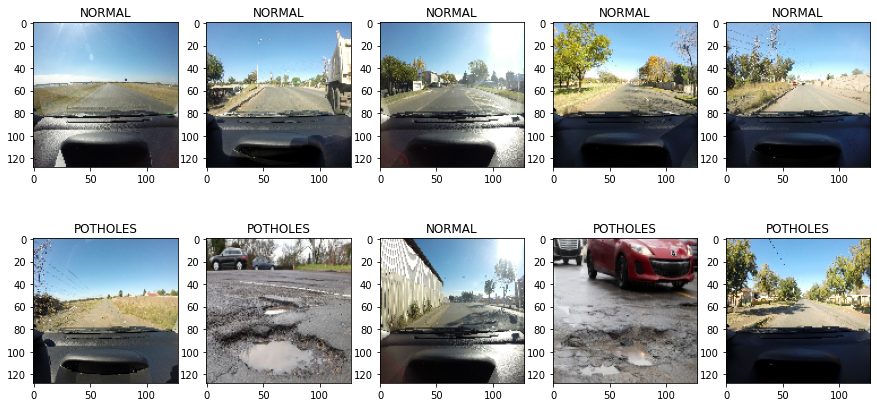

In [9]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range(5):
        l=rn.randint(0,len(y))
        # print(imagepaths[l])
        ax[i,j].imshow(x[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import confusion_matrix

# from glob import glob


In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
x=np.array(x)
x=x/255

x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [12]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
training_history=model.fit(x_train, y_train, epochs= 100, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

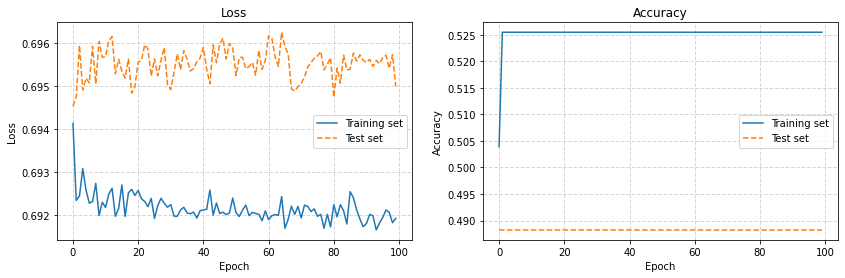

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(training_history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 2s 249ms/step - loss: 0.6958 - accuracy: 0.4882
Test accuracy: 48.82%


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
training_history=model.fit(x_train, y_train, epochs= 35, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(training_history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 3s 464ms/step - loss: 1.6816 - accuracy: 0.8412
Test accuracy: 84.12%
